## Nonparametric Changepoint Detection with multivariate data in Python

This code computes the changepoints in a time series. In this notebook I show how you can use it. 

Let us generate some data and load modules

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import changepoint_detection as cd
import seaborn

%matplotlib inline

### Create univariate data

In [2]:
partition, data = cd.generate_univariate_time_series(7,50,100)

Let's plot this data:

Changepoints are [ 82 143 219 300 394 463 517]


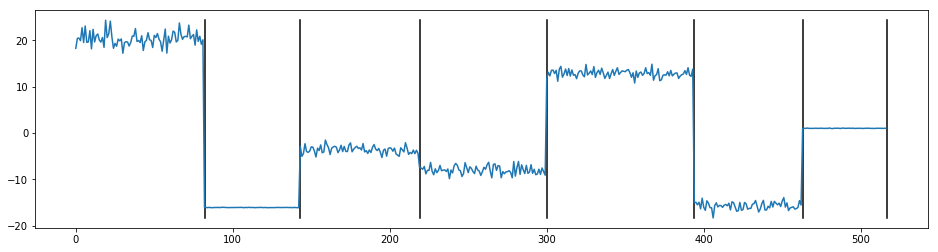

In [3]:
changes = np.cumsum(partition)
print "Changepoints are {}".format(changes)

fig, ax = plt.subplots(figsize=[16,4])
for p in changes:
    ax.plot([p,p], [np.min(data),np.max(data)],'black')
for d in range(1):
    ax.plot(data[:,d])

### Let us try to detect the changes with nonparametric changepoint detection on univariate data

In [4]:
sol = cd.divisive(data, sig_lvl=0.05, R=100, alpha=1)

Found 6 split points


In [5]:
print "Changepoints found are {}".format(sol['estimates'][1:])

Changepoints found are [ 82 143 219 300 394 463 517]


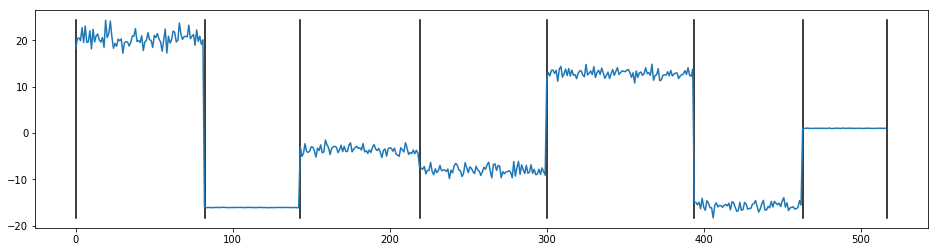

In [6]:
fig, ax = plt.subplots(figsize=[16,4])
for p in sol['estimates']:
    ax.plot([p,p], [np.min(data),np.max(data)],'black')
for d in range(1):
    ax.plot(data[:,d])

Bingo - Perfect estimation of changepoints!

### Create multivariate data

In [7]:
partition, data = cd.generate_multivariate_time_series(7,2,50,100)

Changepoints are [ 96 180 272 348 435 510 577]


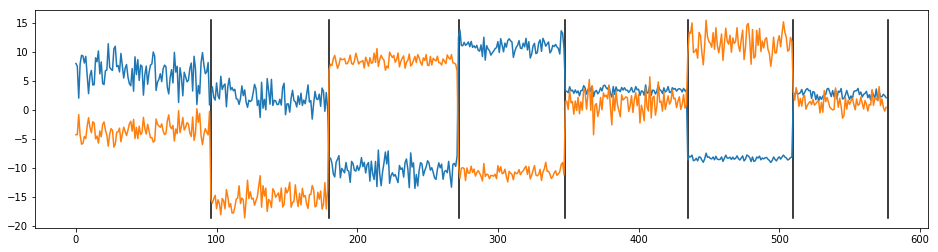

In [8]:
changes = np.cumsum(partition)
print "Changepoints are {}".format(changes)

fig, ax = plt.subplots(figsize=[16,4])
for p in changes:
    ax.plot([p,p], [np.min(data),np.max(data)],'black')
for d in range(2):
    ax.plot(data[:,d])

### Let us try to detect the changes with nonparametric changepoint detection on multivariate data

In [9]:
sol = cd.divisive(data, sig_lvl=0.05, R=100, alpha=1)

Found 6 split points


In [10]:
print "Changepoints found are {}".format(sol['estimates'][1:])

Changepoints found are [ 96 180 272 348 435 510 577]


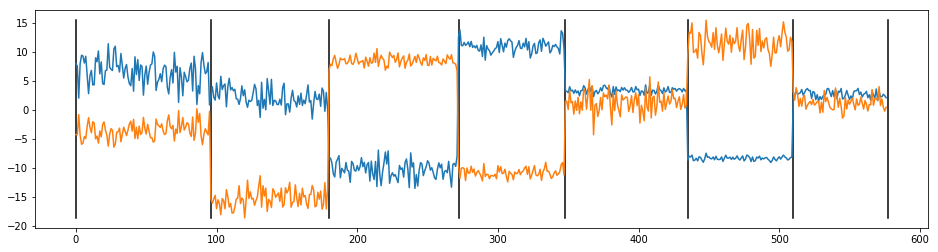

In [11]:
fig, ax = plt.subplots(figsize=[16,4])
for p in sol['estimates']:
    ax.plot([p,p], [np.min(data),np.max(data)],'black')
for d in range(2):
    ax.plot(data[:,d])

Again, perfect estimation!